## Visualizing changes in Band Power for 5 Frequencies and 5 Positions
#### Pre and Post Kava Consumption

This notebook utilizes the [nilearn python package](https://nilearn.github.io/)

#### Load Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, image

#### Generate Martin Data

In [17]:

# Create the pre_kava DataFrame
martin_pre_kava = pd.DataFrame({
    'Region': ["AF3", "T7", "Pz", "T8", "AF4"],
    'Theta': [3, 2.4, 3.8, 2, 5.4],
    'Alpha': [2.2, 1.6, 3.6, 2.4, 2.6],
    'Low_Beta': [1.6, 1.2, 1.4, 1.4, 1.4],
    'High_Beta': [1, 1, 0.8, 1, 1],
    'Gamma': [1.4, 1.4, 1.4, 1.8, 1.6]
})

# Create the post_kava DataFrame
martin_post_kava = pd.DataFrame({
    'Region': ["AF3", "T7", "Pz", "T8", "AF4"],
    'Theta': [4.4, 3.2, 4.8, 2.6, 4.4],
    'Alpha': [4, 3, 4.6, 4.2, 4.2],
    'Low_Beta': [3.6, 2, 2.4, 2.2, 2.8],
    'High_Beta': [1.4, 0.8, 2, 1.2, 2.2],
    'Gamma': [1, 0.8, 1, 0.8, 1.2]
})

# Calculate differences between post-kava and pre-kava
martin_difference_data = martin_post_kava.set_index('Region') - martin_pre_kava.set_index('Region')


In [18]:
martin_difference_data

,Theta,Alpha,Low_Beta,High_Beta,Gamma
Region,,,,,
AF3,1.4,1.8,2.0,0.4,-0.4
T7,0.8,1.4,0.8,-0.2,-0.6
Pz,1.0,1.0,1.0,1.2,-0.4
T8,0.6,1.8,0.8,0.2,-1.0
AF4,-1.0,1.6,1.4,1.2,-0.4


#### Define Electrode Coordiantes

In [19]:
# Define electrode coordinates for AF3, T7, Pz, T8, AF4
coords = {
    'AF3': (-24, 34, 36),  # Frontal lobe
    'T7': (-46, -22, 10),   # Temporal lobe
    'Pz': (0, -23, 38),     # Parietal lobe
    'T8': (46, -22, 10),    # Temporal lobe
    'AF4': (24, 34, 36)     # Frontal lobe
}

# Convert coordinates to a list
coords_list = np.array(list(coords.values()))

# Define the frequency bands for plotting
frequency_bands = ['Theta', 'Alpha', 'Low_Beta', 'High_Beta', 'Gamma']

#### Plot Blank Glass Brain

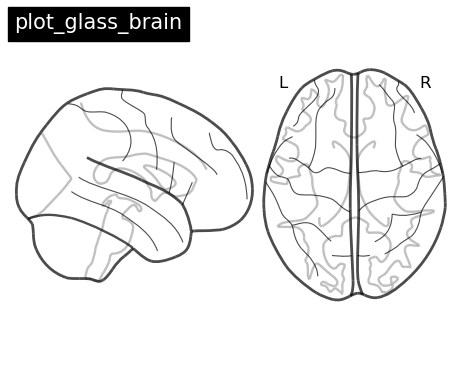

In [20]:
img = plotting.plot_glass_brain(
    stat_map_img=None,  # No statistical image provided
    title="plot_glass_brain",
    black_bg=False,
    display_mode="xz",
    threshold=None,  # Remove threshold
    colorbar=False  # Disable colorbar
)

#### Plot Martin Data

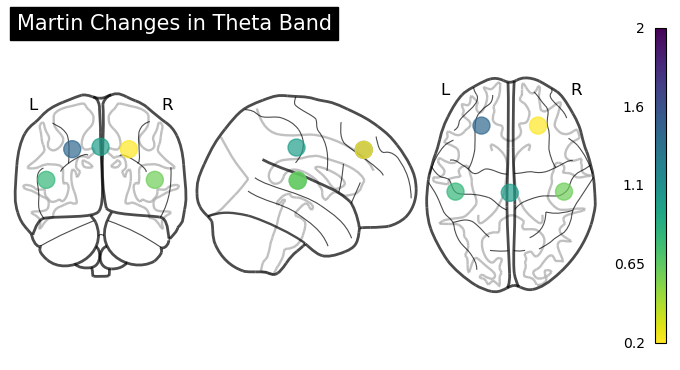

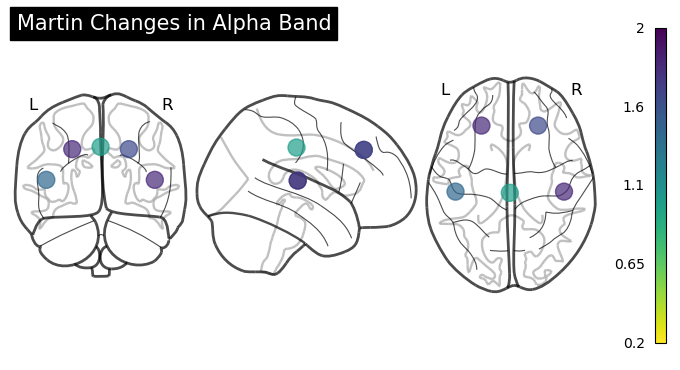

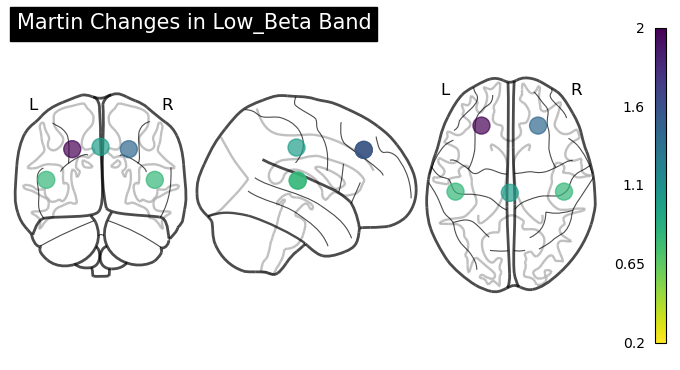

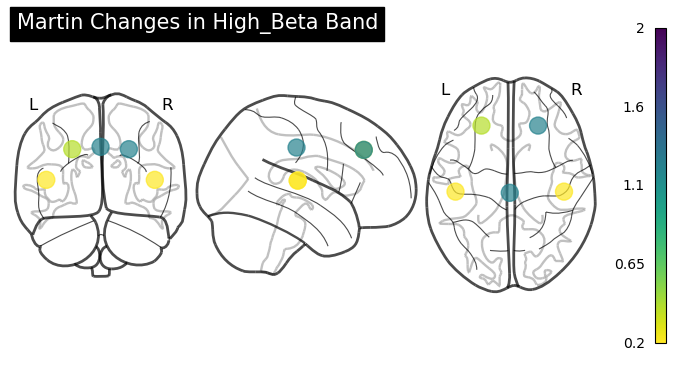

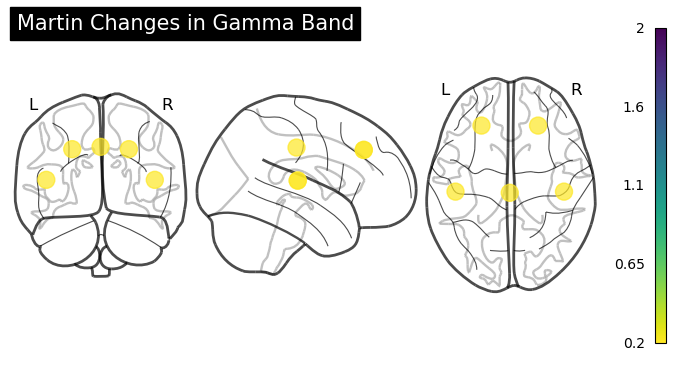

In [21]:

# Calculate global min and max for normalization
global_min = apo_difference_data.min().min()
global_max = martin_difference_data.max().max()

# Create plots for each frequency band
for band in frequency_bands:
    changes = martin_difference_data[band].values  # Get changes for the specific frequency band
    
    # Create the glass brain plot with markers
    plotting.plot_markers(
        node_values=changes, 
        node_coords=coords_list,
        node_size=150,  # Increase marker size
        node_cmap='viridis_r',  # Colormap
        node_vmin=global_min,  # Set global min for normalization
        node_vmax=global_max,  # Set global max for normalization
        alpha=0.7,  # Transparency
        black_bg=False,  # Set black background
        title=f"Martin Changes in {band} Band"  # Set title for each plot
    )

    # Show the plot
    plotting.show()


#### Generate Apo Data

In [22]:
# Create the pre_kava DataFrame
apo_pre_kava = pd.DataFrame({
    'Region': ["AF3", "T7", "Pz", "T8", "AF4"],
    'Theta': [4.2, 2.4, 2.4, 3.8, 4.0],
    'Alpha': [2.0, 1.0, 3.0, 2.4, 2.4],
    'Low_Beta': [1.2, 1.0, 1.4, 1.6, 1.4],
    'High_Beta': [1.0, 0.6, 0.6, 0.8, 1.0],
    'Gamma': [0.4, 0.8, 0.6, 0.8, 0.8]
})

# Create the post_kava DataFrame
apo_post_kava = pd.DataFrame({
    'Region': ["AF3", "T7", "Pz", "T8", "AF4"],
    'Theta': [2.0, 1.2, 1.8, 1.4, 3.0],
    'Alpha': [1.4, 1.0, 1.0, 1.2, 1.4],
    'Low_Beta': [1.2, 0.8, 1.0, 0.8, 1.2],
    'High_Beta': [1.0, 1.0, 1.0, 0.8, 1.0],
    'Gamma': [1.0, 0.8, 0.8, 1.0, 0.8]
})

# Calculate differences between post-kava and pre-kava
apo_difference_data = apo_post_kava.set_index('Region') - apo_pre_kava.set_index('Region')
apo_difference_data

,Theta,Alpha,Low_Beta,High_Beta,Gamma
Region,,,,,
AF3,-2.2,-0.6,0.0,0.0,0.6
T7,-1.2,0.0,-0.2,0.4,0.0
Pz,-0.6,-2.0,-0.4,0.4,0.2
T8,-2.4,-1.2,-0.8,0.0,0.2
AF4,-1.0,-1.0,-0.2,0.0,0.0


#### Plot Apo Data

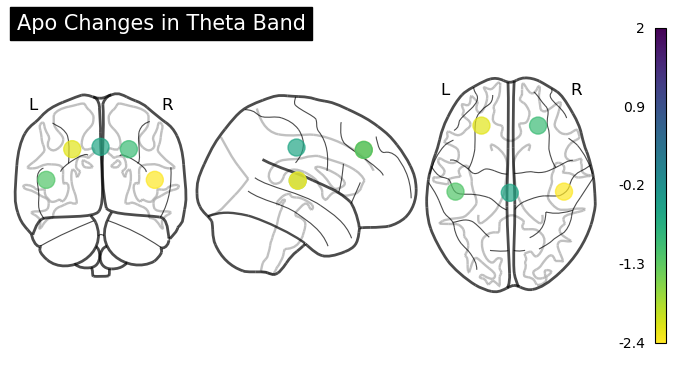

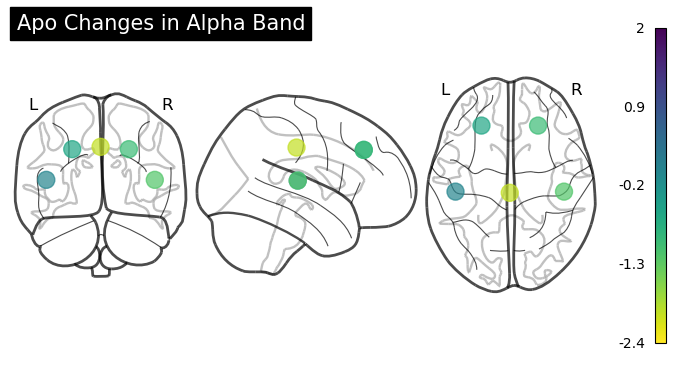

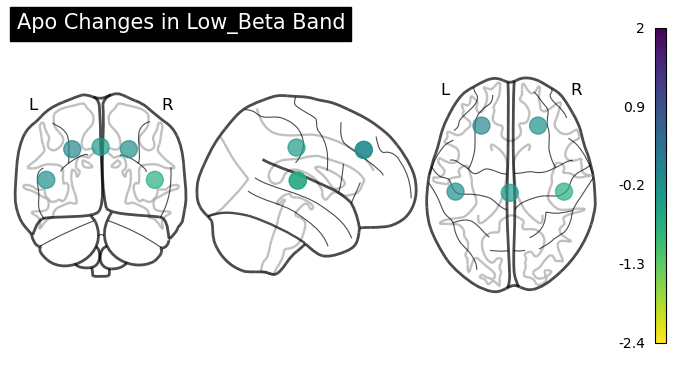

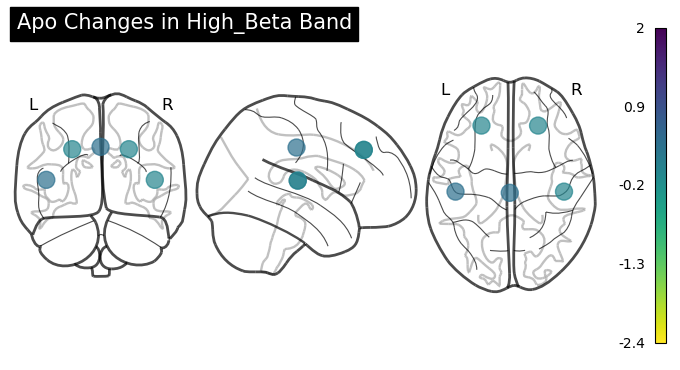

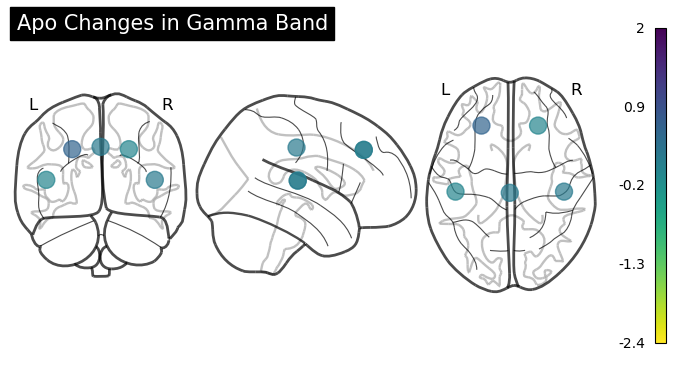

In [23]:
# Calculate global min and max for normalization
global_min = apo_difference_data.min().min()
global_max = martin_difference_data.max().max()

# Create plots for each frequency band
for band in frequency_bands:
    changes = apo_difference_data[band].values  # Get changes for the specific frequency band
    
    # Create the glass brain plot with markers
    plotting.plot_markers(
        node_values=changes, 
        node_coords=coords_list,
        node_size=150,  # Increase marker size
        node_cmap='viridis_r',  # Colormap
        node_vmin=global_min,  # Set global min for normalization
        node_vmax=global_max,  # Set global max for normalization
        alpha=0.7,  # Transparency
        black_bg=False,  # Set black background
        title=f"Apo Changes in {band} Band"  # Set title for each plot
    )

    # Show the plot
    plotting.show()

### Updates

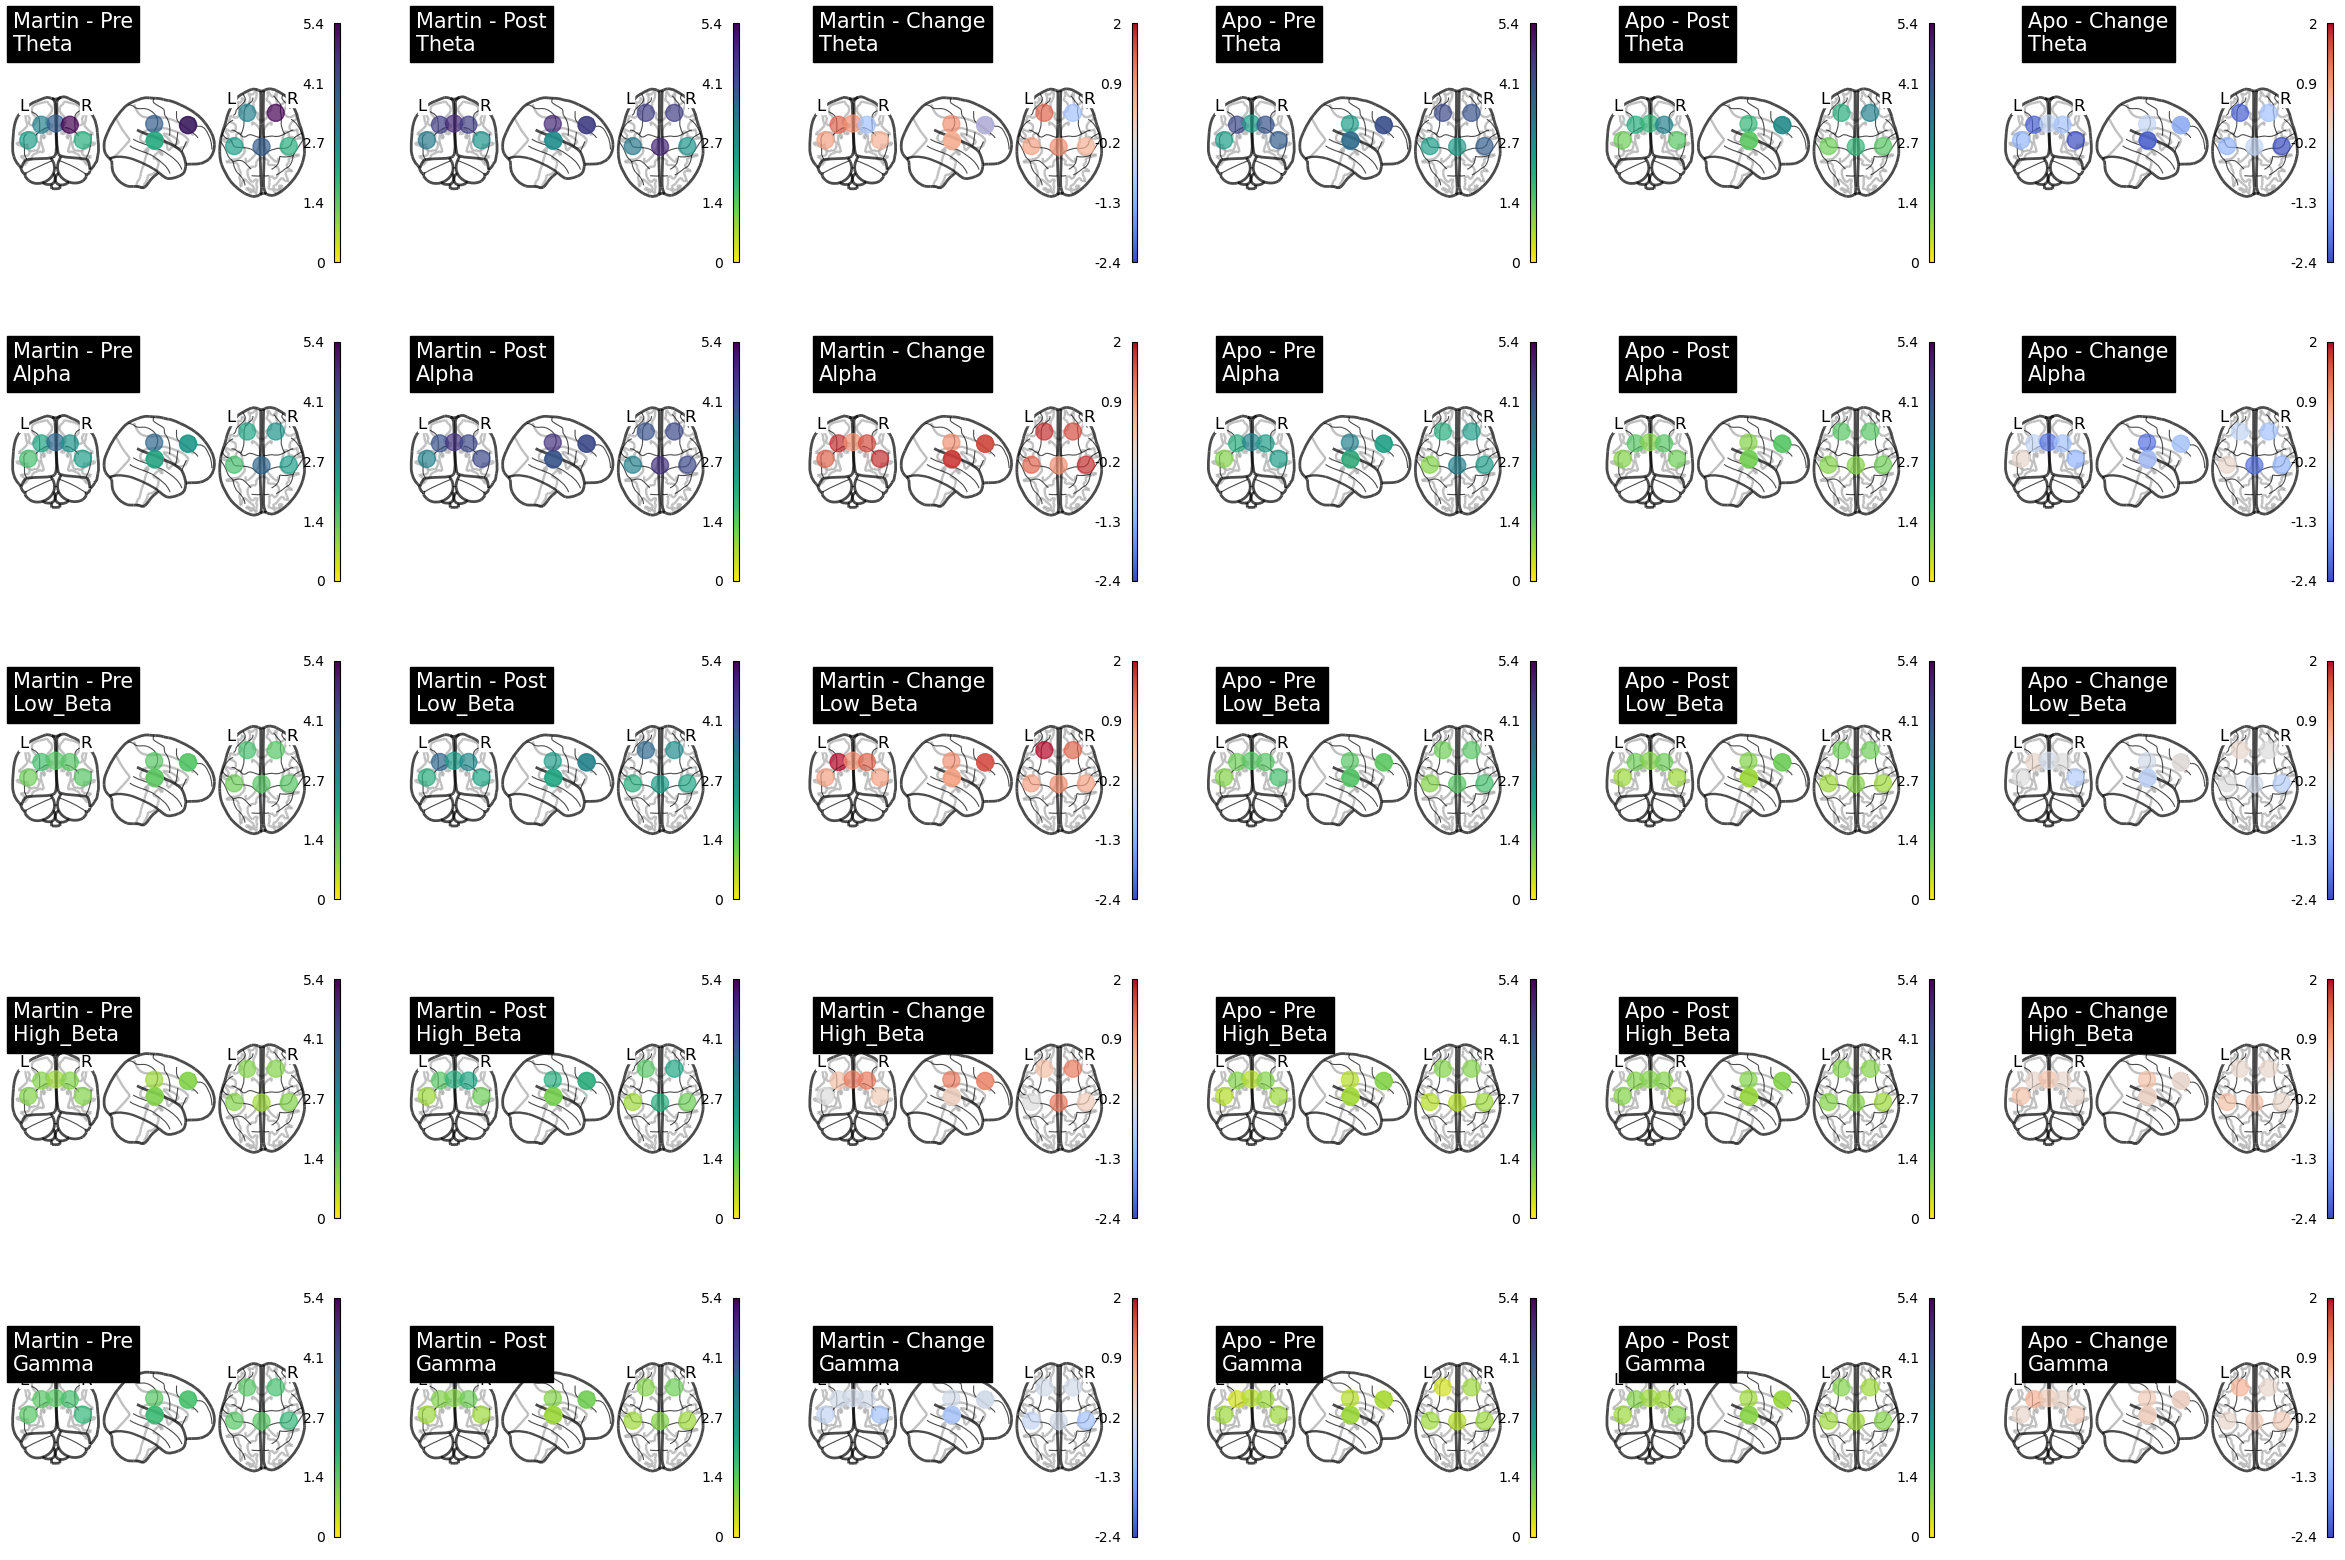

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting

# Define electrode coordinates for AF3, T7, Pz, T8, AF4 (example)
coords = {
    'AF3': (-24, 34, 36),  # Frontal lobe
    'T7': (-46, -22, 10),   # Temporal lobe
    'Pz': (0, -23, 38),     # Parietal lobe
    'T8': (46, -22, 10),    # Temporal lobe
    'AF4': (24, 34, 36)     # Frontal lobe
}
coords_list = np.array(list(coords.values()))  # Convert to numpy array

# Define frequency bands, patients, and stages
frequencies = ['Theta', 'Alpha', 'Low_Beta', 'High_Beta', 'Gamma']
patients = ['Martin', 'Apo']
stages = ['Pre', 'Post', 'Change']

# Ensure data for pre, post, and change is correctly assigned
martin_data = {
    'Pre': martin_pre_kava.set_index('Region'),
    'Post': martin_post_kava.set_index('Region'),
    'Change': martin_difference_data
}

apo_data = {
    'Pre': apo_pre_kava.set_index('Region'),
    'Post': apo_post_kava.set_index('Region'),
    'Change': apo_difference_data
}

# Calculate global min and max for normalization
global_min = min(apo_difference_data.min().min(), martin_difference_data.min().min())
global_max = max(apo_difference_data.max().max(), martin_difference_data.max().max())

# Function to get the correct colormap and normalization for each stage
def get_colormap_and_norm(stage):
    if stage == 'Change':
        return 'coolwarm', global_min, global_max  # Diverging colormap centered at 0
    else:
        return 'viridis_r', 0, 5.4  # Adjusted range for Pre and Post

# Create the grid layout with matplotlib
fig, axes = plt.subplots(
    nrows=len(frequencies), ncols=len(patients) * len(stages), figsize=(30, 20)
)

# Iterate over frequencies (rows) and patient-stage combinations (columns)
for row_idx, freq in enumerate(frequencies):
    for col_idx, (patient, stage) in enumerate([(p, s) for p in patients for s in stages]):

        # Select the correct axis for this subplot
        ax = axes[row_idx, col_idx]

        # Fetch the correct data for the current patient and stage
        data = martin_data if patient == 'Martin' else apo_data
        node_values = data[stage][freq].values  # Extract the frequency values

        # Get the colormap and normalization for the current stage
        cmap, vmin, vmax = get_colormap_and_norm(stage)

        # Plot the glass brain markers on this axis
        plotting.plot_markers(
            node_values=node_values,
            node_coords=coords_list,
            node_size=150,  # Increase marker size for visibility
            node_cmap=cmap,  # Use the correct colormap
            node_vmin=vmin,  # Set global min for normalization
            node_vmax=vmax,  # Set global max for normalization
            alpha=0.7,  # Transparency
            black_bg=False,  # White background
            title=f"{patient} - {stage}\n{freq}",  # Title with patient, stage, and frequency
            axes=ax  # Plot on the specific axis
        )

# Adjust layout to avoid overlaps
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Show the complete grid of plots
plt.show()



In [33]:
global_max

2.0